In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
# Get rid of column 'race/ethnicity' as there was no indication 
# or clearance what each group means and most likely it is not
# defining factor in this study
df = df.drop('race/ethnicity', axis=1)

In [5]:
# change 'gender' column into numerical values where 0 represents 'male' and 1 represents 'female'
#df = df.replace({'male': 0, 'female': 1})

# convert Gender into numeric format
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['gender']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

# Change unique values in column where 'high school' is 0, 'some high school' is 1,
# 'some college' is 2, 'assocate's degree is 3, 'bachelor's degree is 4 and
# 'master's degree is 5
df = df.replace({"high school": 0 , "some high school": 1, "some college": 2,
                 "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5})

# Change values in 'lunch' column fro 'free/reduced' for 1 and standard(not free) for 0
df = df.replace({'free/reduced': 0, 'standard': 1})

# Change values for 'test preparation course' for none(not completed) into 0 and completed into 1
df = df.replace({'none': 0, 'completed': 1})

df

C:\Users\vilil\AppData\Local\Temp\ipykernel_10032\293414200.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"high school": 0 , "some high school": 1, "some college": 2,
C:\Users\vilil\AppData\Local\Temp\ipykernel_10032\293414200.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'free/reduced': 0, 'standard': 1})
C:\Users\vilil\AppData\Local\Temp\ipykernel_10032\293414200.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,1,1,67,67,63
1,0,1,0,0,40,59,55
2,1,2,0,0,59,60,50
3,1,0,1,0,77,78,68
4,1,3,1,1,78,73,68
...,...,...,...,...,...,...,...
995,1,0,1,0,73,70,65
996,1,3,0,1,85,91,92
997,0,1,0,0,32,35,41
998,0,2,1,0,73,74,82


In [6]:
# our dataset is not quite balanced regarding target variable
# this will probably cause some problems with the logistic regression
df['math score'].value_counts()

math score
63    34
71    30
77    30
74    28
57    27
      ..
26     2
23     1
29     1
34     1
25     1
Name: count, Length: 77, dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

2

In [8]:
df = df.drop_duplicates()

In [9]:
 # check for missing values
df.isna().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('gender', axis=1)
y = df['gender']

In [11]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# model = make_pipeline(StandardScaler(), RandomForestClassifier(criterion="entropy", class_weight="balanced", ccp_alpha=0.05))

# Create pipeline for standard scaler and random forest classifier
model = make_pipeline(RandomForestRegressor())
model.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [13]:
predictions = model.predict(X_test)

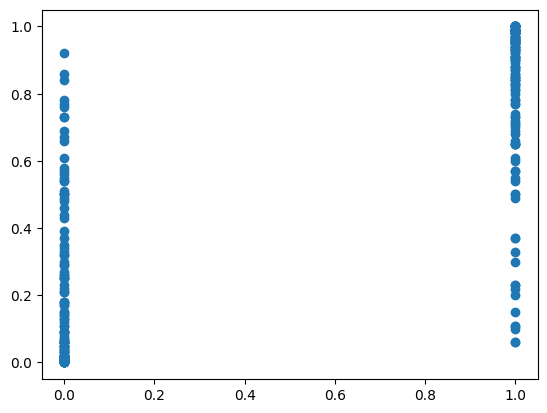

In [14]:
# Visualize the distribution of math test scores that
# is divided by gender
plt.scatter(y_test, predictions)
plt.show()

In [23]:
# let's try with some new imaginary data
tester_row = {
    'parental level of education': 2,
    'lunch': 1,
    'test preparation course': 0,
    'math score': 70,
    'reading score': 90,
    'writing score': 90
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [24]:
# use our model to predict our tester_row data
result = model.predict(tester_row)[0]

print()
print(f"More likely to be boy(0) or girl(1):")
print(f"{round(float(result), 2)} quality level")
print("----------------")

import math
lower_level = math.floor(result)
upper_level = math.ceil(result)

print(f"Quality level is in range: {lower_level} - {upper_level}")


Predicted quality level for this red wine:
0.02 quality level
----------------
Quality level is in range: 0 - 1
